# TP XPath 2.0

https://www.w3.org/TR/1999/REC-xpath-19991116/

https://lxml.de/

https://github.com/sissaschool/elementpath

https://pypi.org/project/graphviz/

In [2]:
!pip install elementpath
!pip install lxml 
!pip install graphviz
!pip install pydotplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 4.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 941.1 kB/s eta 0:00:000:00:01
  Using cached pydotplus-2.0.2-py3-none-any.whl


**INSTALLATION GRAPHVIZ**

L'installation de graphviz n'est pas obligatoire (visualisation graphique)

https://graphviz.org/

- Linux : sudo apt install graphviz
- Windows : http://graphviz.org/download           

In [3]:
import io
import pydotplus
import elementpath
from lxml import etree
from copy import deepcopy
from graphviz import Source
from IPython.display import display, Image

### Fonctions d'affichage

In [2]:
def printXML(element):
    t=etree.ElementTree(element)
    str=etree.tostring(t, pretty_print=True, encoding='unicode')
    print(str)
    return str
 
        
def printXPath(xmltree,xp):
    # r=xmltree.xpath(xp)
    try:
        r=elementpath.select(xmltree,xp)
        for x in r:
            printXML(x)
    except:
        print(f"error in expression ({xp}) or inputfile")
        

def displayXPath(xmltree,xp,pngfile="reponse"):
    # r=xmltree.xpath(xp)
    r=elementpath.select(xmltree,xp)
    reponse=etree.Element("reponse")
    for x in r:
        reponse.append(deepcopy(x))
    displayXMLInline(reponse)

    
def displayXML(t,pngfile="xpath"):
    f_xslt = open("xslt/xml2dot.xslt","r")
    xslt=etree.parse(f_xslt)
    transform = etree.XSLT(xslt)
    s_dot=transform(t)
    try:
        s=Source(str(s_dot),filename="gendata/"+pngfile+".dot", format="png")
    except:
        print("install graphviz")
        print(etree.tostring(t, pretty_print=True, encoding='unicode'))
    s.view()
    
def displayXMLInline(t):
    f_xslt = open(f"xslt/xml2dot.xslt","r")
    xslt=etree.parse(f_xslt)
    transform = etree.XSLT(xslt)
    s_dot=str(transform(t))
    # print(s_dot)
    # with io.StringIO(s_dot) as f:
    #    a=nx.nx_pydot.read_dot(f)
    try:
        dg = pydotplus.graph_from_dot_data(s_dot)
        png = dg.create_png()
        display(Image(png))
    except:
        print("install graphviz")
        print(etree.tostring(t, pretty_print=True, encoding='unicode'))
    # print(s_dot)
    # return s_dot

### Lecture des documents XML

In [6]:
# ouvrir les fichiers XML
f1 = open("data/roisdefrance.xml","rb")
f2 = open("data/roisdefranceplat.xml","rb")
f3 = open("1477-9560-3-5.nxml", "rb")
# parser les documents
tree1=etree.parse(f1)
tree2=etree.parse(f2)
tree3=etree.parse(f3)


### Affichage graphique des documents xml 
nécessite l'installation de graphviz (https://graphviz.org/)
* Linux : sudo apt install graphviz
* Windows : http://graphviz.org/download 

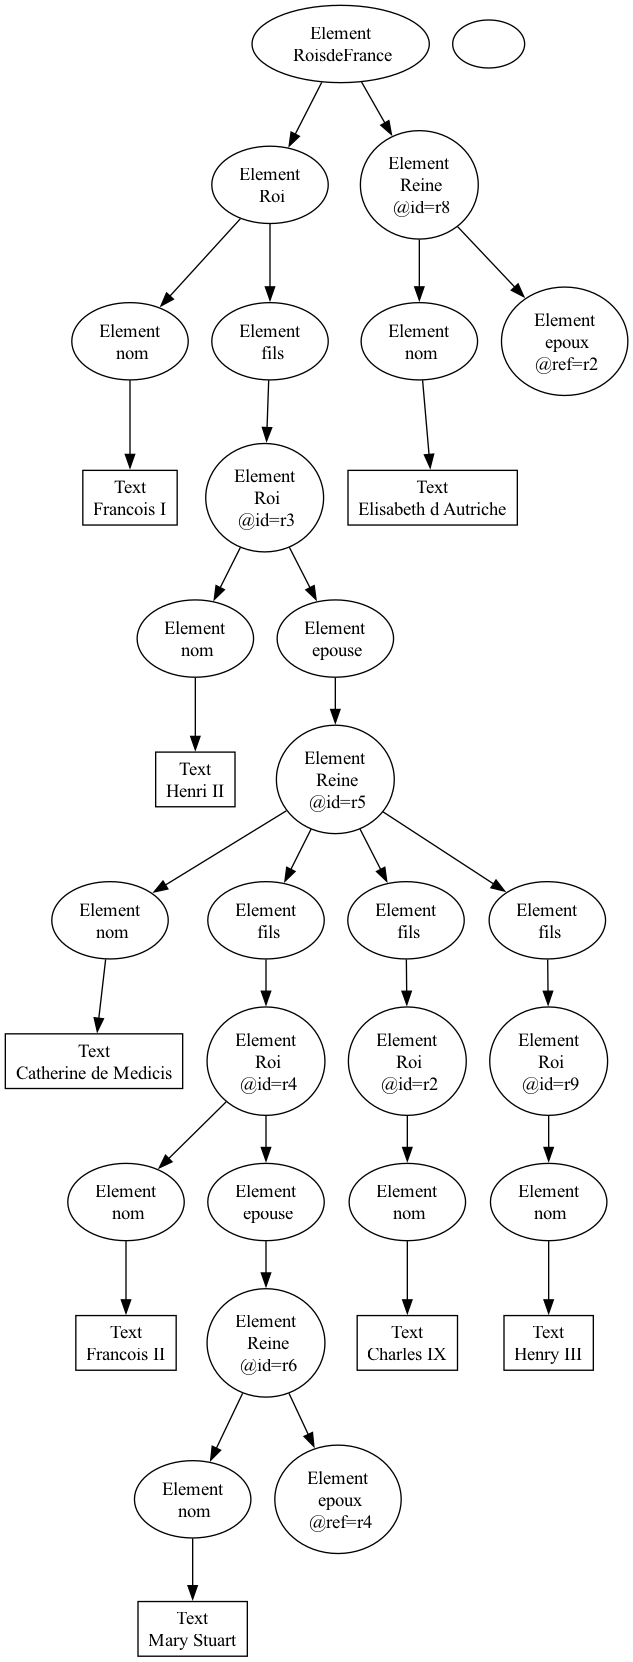

In [4]:
displayXMLInline(tree1)

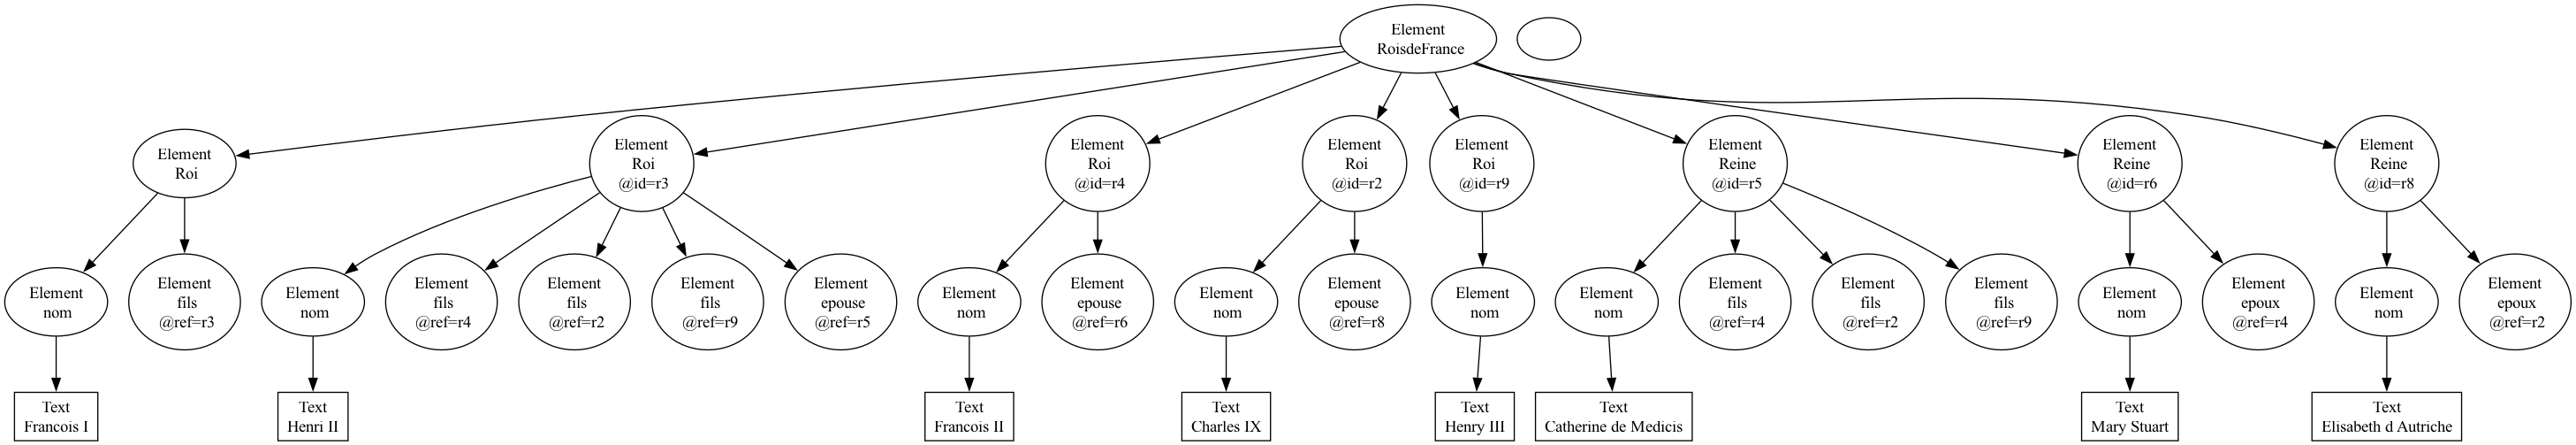

In [5]:
displayXMLInline(tree2)

**Exercice:** Evaluez les expressions XPath suivants et étudiez les résultats

In [8]:
# tous les rois
q0='//Roi'
printXPath(tree1,q0)

<Roi>
  <nom>Francois I</nom>
  <fils>
    <Roi id="r3">
      <nom>Henri II</nom>
      <epouse>
        <Reine id="r5">
          <nom>Catherine de Medicis</nom>
          <fils>
            <Roi id="r4">
              <nom>Francois II</nom>
              <epouse>
                <Reine id="r6">
                  <nom>Mary Stuart</nom>
                  <epoux ref="r4"/>
                </Reine>
              </epouse>
            </Roi>
          </fils>
          <fils>
            <Roi id="r2">
              <nom>Charles IX</nom>
            </Roi>
          </fils>
          <fils>
            <Roi id="r9">
              <nom>Henry III</nom>
            </Roi>
          </fils>
        </Reine>
      </epouse>
    </Roi>
  </fils>
</Roi>

<Roi id="r3">
  <nom>Henri II</nom>
  <epouse>
    <Reine id="r5">
      <nom>Catherine de Medicis</nom>
      <fils>
        <Roi id="r4">
          <nom>Francois II</nom>
          <epouse>
            <Reine id="r6">
              <nom>Mary S

In [11]:
printXPath(tree3, "//*")

<!DOCTYPE article PUBLIC "-//NLM//DTD Journal Archiving and Interchange DTD v2.3 20070202//EN" "archivearticle.dtd">
<article xmlns:xlink="http://www.w3.org/1999/xlink" article-type="research-article">
  <?properties open_access?>
  <front>
    <journal-meta>
      <journal-id journal-id-type="nlm-ta">Thromb J</journal-id>
      <journal-title>Thrombosis Journal</journal-title>
      <issn pub-type="epub">1477-9560</issn>
      <publisher>
        <publisher-name>BioMed Central</publisher-name>
        <publisher-loc>London</publisher-loc>
      </publisher>
    </journal-meta>
    <article-meta>
      <article-id pub-id-type="pmid">15836797</article-id>
      <article-id pub-id-type="pmc">1087887</article-id>
      <article-id pub-id-type="publisher-id">1477-9560-3-5</article-id>
      <article-id pub-id-type="doi">10.1186/1477-9560-3-5</article-id>
      <article-categories>
        <subj-group subj-group-type="heading">
          <subject>Original Clinical Investigation</subject>
  

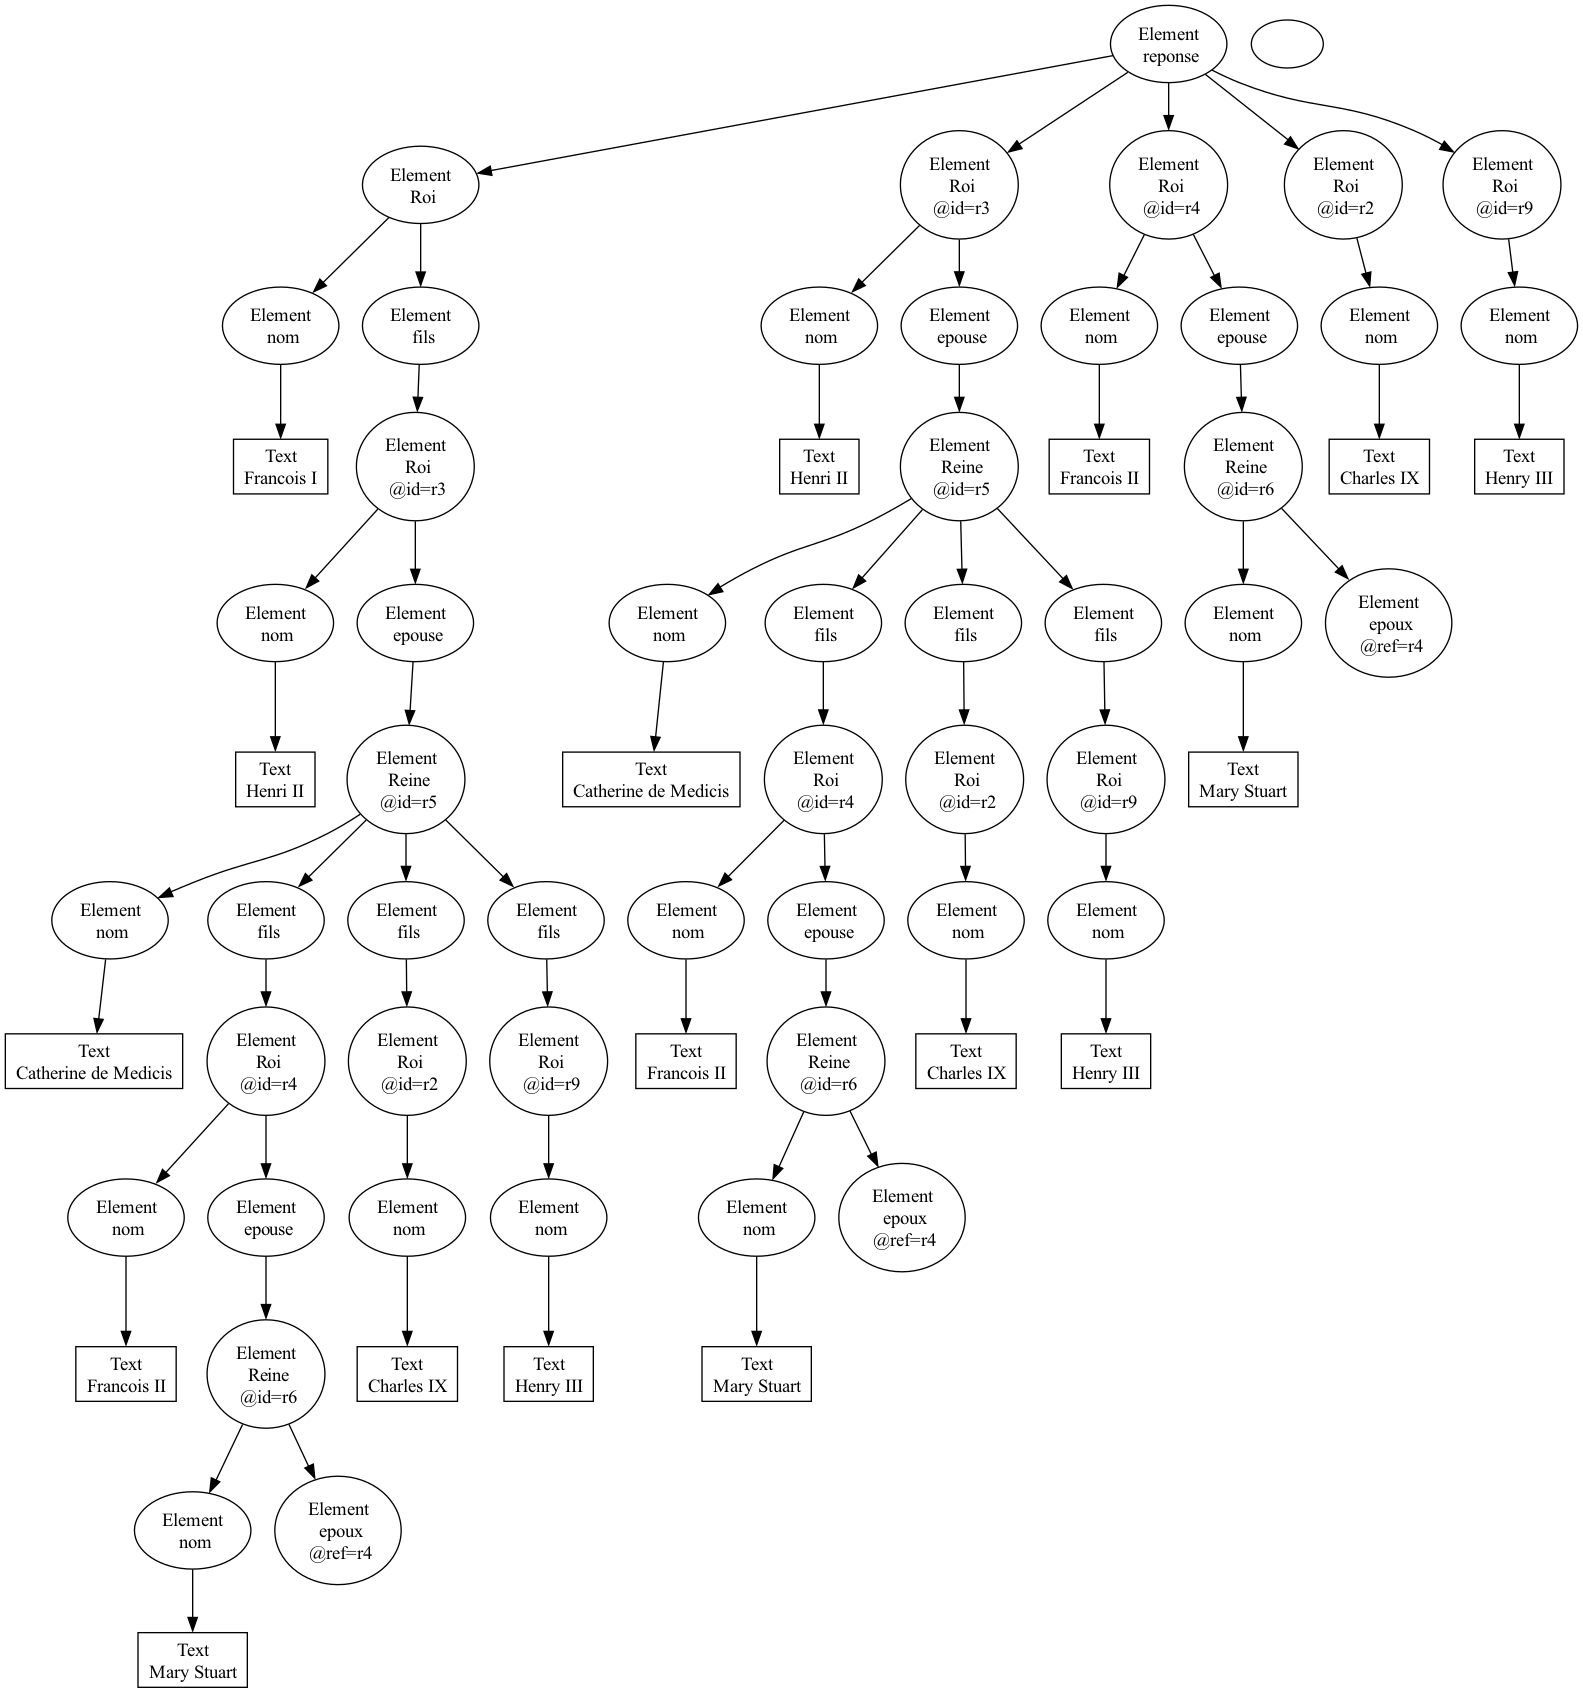

In [9]:
# affichage graphique
displayXPath(tree1,q0,"res0")

In [ ]:
# tous les rois sauf Henri II
q1='//Roi except //Roi[nom="Henri II"]'
printXPath(tree1,q1)

In [ ]:
# affichage graphique
displayXPath(tree1,q1,"res1")

In [ ]:
# tous les rois (tree2)
q1='//Roi'
printXPath(tree2,q1)

In [ ]:
# affichage graphique
displayXPath(tree2,q1,"res2")

In [ ]:
# l'epouse de François II
q2a='//Roi[nom="Francois II"]/epouse'
printXPath(tree1,q2a)

In [ ]:
# réécrire la requête précédente appliquée à tree2 
q2a='....'
printXPath(tree2,q2a)

**Exercice:** Exprimez les requêtes suivantes sur tree1 et tree2

- le nom de l'épouse de François II

- le nom de l'épouse de François II (sans tag)

- les noms des rois et des reines

- les noms des fils de Catherine de Medicis;

- le nom de l’épouse de Henri II; 

- le nom de l’époux de Mary Stuart (attention il existe une référence);

    
   


- le nom de l’époux d’Elisabeth d’Autriche;

   

- le nom de la belle mère de Mary Stuart (de la personne qui a un fils dont l’épouse s’appelle Mary Stuart);

 

- les noms des frères de Francois II;

    

- les rois sans épouses;

- les noms des rois et reines avec au moins un fils;

    

-  les noms des rois et reines sans fils;

## Les Oeuvres de Shakespeare

In [ ]:
# ouvrir les fichiers XML
f3 = open("data/shakespeare/hamlet.xml","rb")
tree3=etree.parse(f3)


In [ ]:
# Tout Hamlet
printXPath(tree3,'/PLAY')

In [ ]:
# Les personnages
printXPath(tree3,'//PERSONA')

In [ ]:
# La scène avec la ligne "To be, or not to be: that is the question:"
q='//SCENE/SPEECH[LINE = "To be, or not to be: that is the question:"]'
printXPath(tree3,q)

In [ ]:
# Les titres des actes et des scenes avec Hamlet

printXPath(tree3,"//ACT[SCENE/SPEECH/SPEAKER='HAMLET']/TITLE")

In [ ]:
# Les titres des scenes avec Hamlet

printXPath(tree3,"...")

In [ ]:
# Les titres des actes et des scenes avec Hamlet

printXPath(tree3,"...")

In [ ]:
# Les titres des scènes avec Hamlet et Laertes

printXPath(tree3,"...")